In [22]:
'Importando bibliotecas'
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'Importando os dados'
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.591286  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.617764  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.723652  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.763355  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.173679  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.674999  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

In [10]:
"Anális Exploratória"
'1. Verificando o preço máximo de fechamento para cada banco'
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [11]:
"Criando Banco para receber dados de Retorno"
returns = pd.DataFrame()

In [13]:
for t in tickers:
    returns[t+' Return'] = bank_stocks[t]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


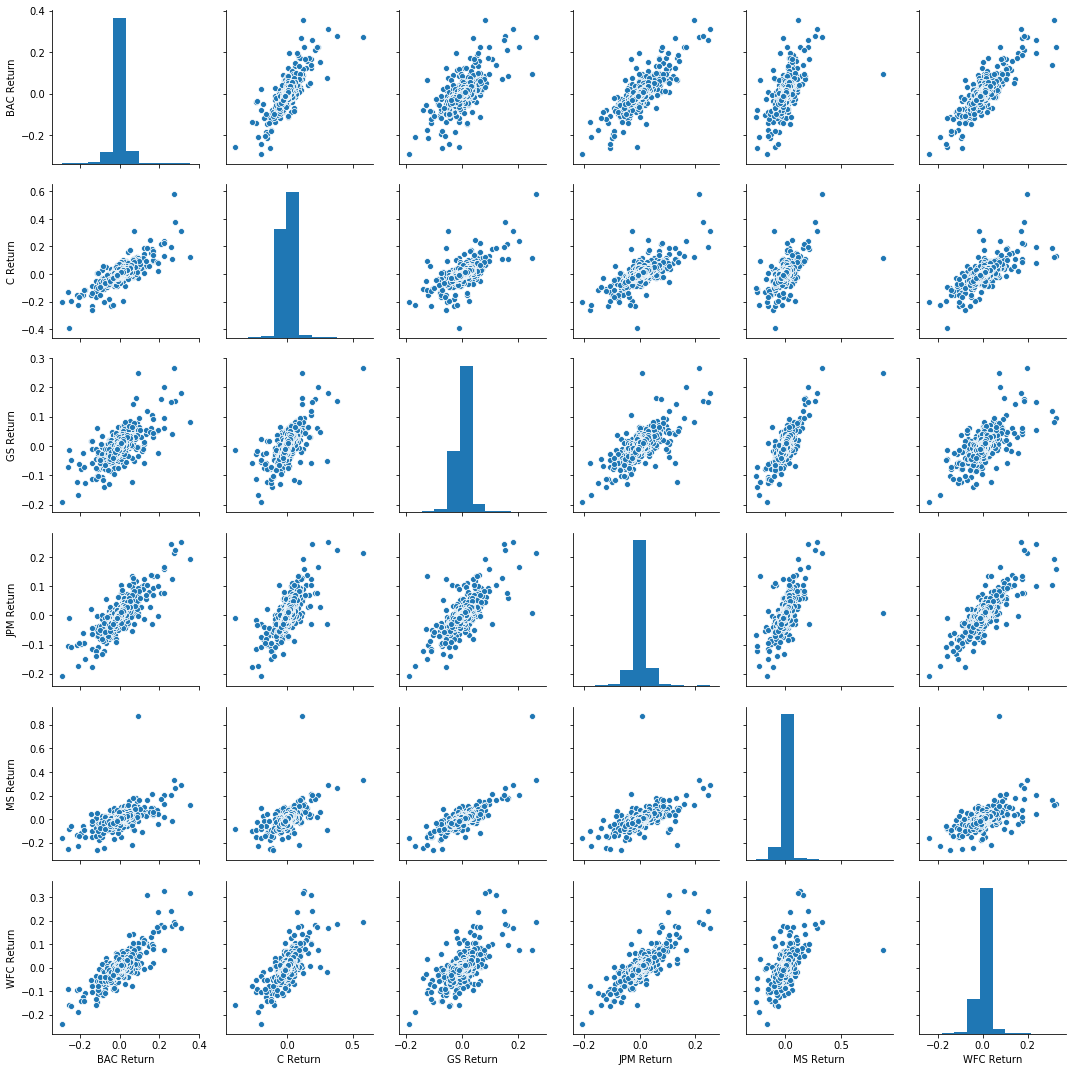

In [17]:
"Gráfificos de dispersão para avaliar possíveis relações linerares usando os dados de Retorno"
sns.pairplot(returns [1:])

In [18]:
'Avaliando Melhor e Pior dia de Retorno entre os Bancos'
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


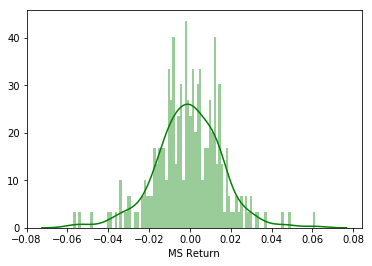

In [20]:
'Distplot para MS Returns'
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

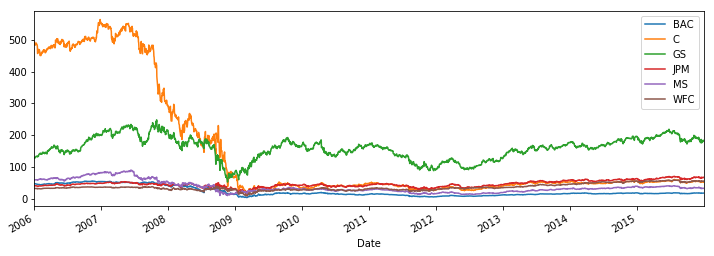

In [23]:
"Gráfico de linha com o preço de fechamento de cada banco"
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()